In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


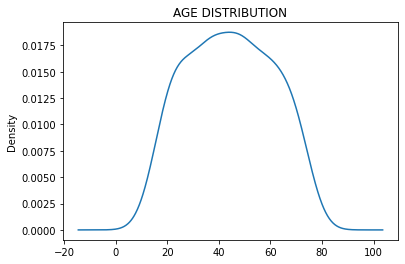

In [4]:
plt.title("AGE DISTRIBUTION")
df['Age'].plot(kind='kde')

In [5]:
print(f"Mean age is {df['Age'].mean()}")

Mean age is 44.315


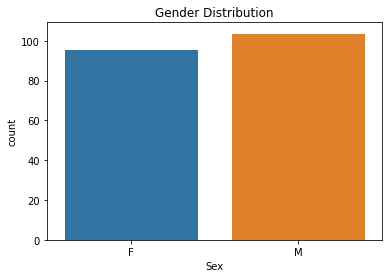

In [6]:
plt.title("Gender Distribution")
sns.set_style("darkgrid")
sns.countplot(x=df.Sex)

In [7]:
print("There is a equal distribution of MAle and Female in above plot.")

There is a equal distribution of MAle and Female in above plot.


In [8]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

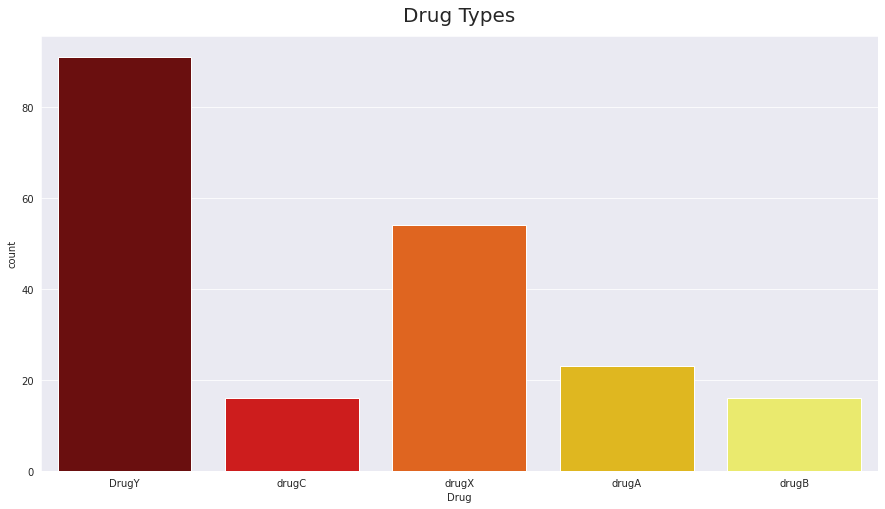

In [9]:
plt.figure(figsize=(15,8))
plt.title("Drug Types", fontsize=20, y=1.02)
sns.countplot(x = df.Drug, palette="hot")
plt.show()

In [10]:
print("Drug C is least commonly used and Drug Y is most commonly used")

Drug C is least commonly used and Drug Y is most commonly used


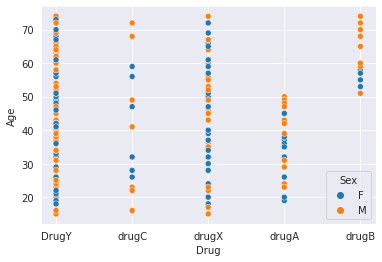

In [11]:
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=df)

In [12]:
print("We find that Drug B is used by people over age 50 and drug A is used by people under 50")

We find that Drug B is used by people over age 50 and drug A is used by people under 50


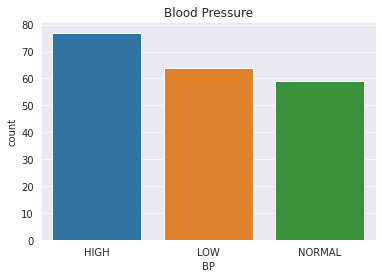

In [13]:
plt.title("Blood Pressure")
sns.countplot(x=df.BP)

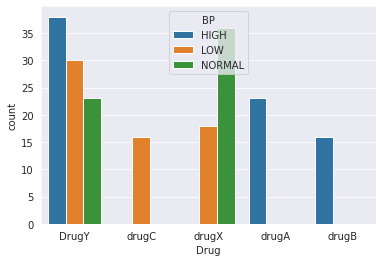

In [14]:
sns.countplot(x='Drug',hue='BP',data =df)

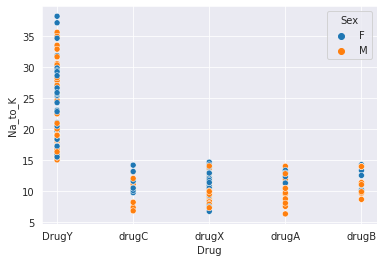

In [15]:
sns.scatterplot(x='Drug',y="Na_to_K",hue='Sex',data=df)

In [16]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 2})
df['BP'] = df['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
df['Cholesterol'] = df['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
df["Drug"] = df["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


In [18]:
X = df.drop('Drug',axis=1)
y = df['Drug']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(X_train),len(X_test)

(160, 40)

In [21]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [22]:
import sklearn.linear_model as sk

logreg = sk.LogisticRegression()
logreg.fit(X_train,y_train)
#model = LogisticRegressionCV()
#model.fit(X_train,y_train)
#import numpy as np
#np.any(np.isnan(mat))
#np.all(np.isfinite(mat))

LogisticRegression()

In [23]:
print(f"Accuracy score:- {logreg.score(X_test,y_test)*100}")

Accuracy score:- 92.5


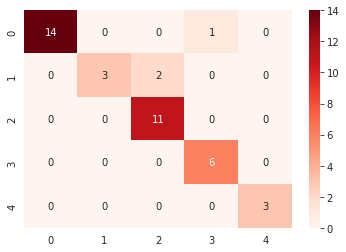

In [24]:
predict = logreg.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      0.60      0.75         5
           3       0.85      1.00      0.92        11
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         3

    accuracy                           0.93        40
   macro avg       0.94      0.91      0.91        40
weighted avg       0.94      0.93      0.92        40



Random Forest Classifier

In [26]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
print(f"Accuracy score:- {model.score(X_test,y_test)*100}")

Accuracy score:- 100.0


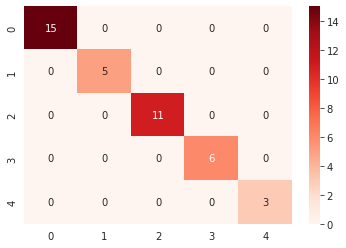

In [28]:
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [29]:
#Classification report of random forest

from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
print(f"Accuracy score:- {model.score(X_test,y_test)*100}") #Score for desicion tree

Accuracy score:- 100.0


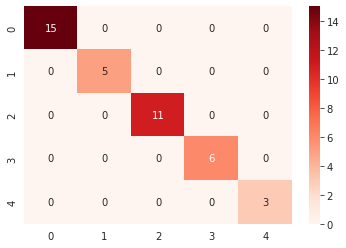

In [32]:
#plotting confusion matrix for the this model

predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



KNN with cross validation

In [34]:
scores = {}

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X,y,cv=5)
scores['Knn']= np.mean(cv_scores)
print(f"KNN Score : {np.mean(cv_scores)}")

KNN Score : 0.7100000000000001


SVM Classifier

In [36]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, X,y ,cv=5)
print(f"Accuracies : {np.mean(accuracies)}")

Accuracies : 0.7


In [37]:
from sklearn.model_selection import GridSearchCV
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.96875
Test Score: 1.0
